## <font color='green'>A special thanks to all my mentors for helping me constantly to progress technically</font>
## Jupyter notebook prepared, arranged and executed by <font color='red'>Karthi Balasundaram</font> , <font color='blue'> sentimentally analysing emotions (anger, sadness, joy & fear) in English language using real tweet data from twitter.</font>

In [3]:
# installing natural language toolkit(nltk)
#!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 2.4 MB/s            
     |████████████████████████████████| 288 kB 2.6 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [9]:
# installing openpyxl (a python library to read/write excel files)
#!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 242 kB 1.7 MB/s            
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
#importing other default and necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
# stemmer = nltk.SnowballStemmer("english")
# nltk.download('stopwords')
# stopword=set(stopwords.words('english'))

In [4]:
#reading the excel file using pandas library
data = pd.read_csv("/Users/karthibalasundaram/Desktop/rawCodesInMac/eng_dataset.csv")

In [5]:
#the below line calls last 5 rows from the excel
data.tail()

,ID,sentiment,content
7097,40781,sadness,@VivienLloyd Thank you so much! Just home - st...
7098,40782,sadness,Just put the winter duvet on ☃️❄️🌬☔️
7099,40783,sadness,@SilkInSide @TommyJoeRatliff that's so pretty!...
7100,40784,sadness,@BluesfestByron second artist announcement loo...
7101,40785,sadness,I can literally eat creamy pesto pasta topped ...


In [6]:
#the below line calls first 5 rows from the excel
data.head()

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


In [7]:
#understanding rows and columns present in the excel
data.shape

(7102, 3)

In [8]:
#retreives basic info about the excel data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         7102 non-null   int64 
 1   sentiment  7102 non-null   object
 2   content    7102 non-null   object
dtypes: int64(1), object(2)
memory usage: 166.6+ KB


In [9]:
#a brief description about the data
data.describe()

,ID
count,7102.000000
mean,25106.966207
std,10692.625426
min,10000.000000
25%,20074.250000
50%,21849.500000
75%,31372.750000
max,41532.000000


In [10]:
data.isnull().sum()

ID           0
sentiment    0
content      0
dtype: int64

In [11]:
#retreives all the columns
data.columns

Index(['ID', 'sentiment', 'content'], dtype='object')

In [14]:
#lists first 10 data(emotions) listed under the column "sentiment"
data[["sentiment"]].tail(10)

,sentiment
7092,sadness
7093,sadness
7094,sadness
7095,sadness
7096,sadness
7097,sadness
7098,sadness
7099,sadness
7100,sadness
7101,sadness


In [17]:
#lists first 5 data(content) listed under the column "content"
data[["content"]].head()

,content
0,At the point today where if someone says somet...
1,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,This game has pissed me off more than any othe...
3,@spamvicious I've just found out it's Candice ...
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


In [18]:
# #lists first 5 data(langauge) listed under the column "language"
# data[["language"]].head()

In [20]:
#displays the number of emotions accordingly
data["sentiment"].value_counts()

fear       2252
anger      1701
joy        1616
sadness    1533
Name: sentiment, dtype: int64

In [22]:
#lists first 5 ID's listed under the column "ID"
data[["ID"]].head()

,ID
0,10941
1,10942
2,10943
3,10944
4,10945


In [24]:
#sorting the languages
pi = data.sentiment.value_counts().sort_values()

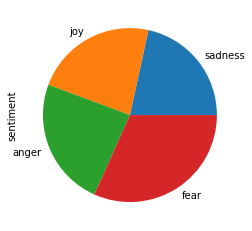

In [25]:
#displaying the sorted lanuages in a pie chart
displ = pi.plot(kind = 'pie')

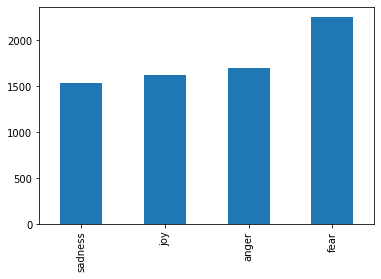

In [28]:
#displaying the sorted lanuages in a bar chart
displ1 = pi.plot(kind = 'bar')

In [44]:
#displays the 369th content
data["content"][369]

'@Bell @Bell_Support Cancelling home Fibe, Internet and TV this afternoon - as soon as I can arrange alternate Internet. 2/2 #angry #fedup'

In [45]:
# defining function for twitter hashtag extraction to classify sentiment analysis
def hashtag_extract(text_list):
    hashtags = []
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)  
    return hashtags

In [62]:
def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    b = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
    # selecting top 60 most frequent hashtags
    b = b.nlargest(columns="Count", n = 60)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=b, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [63]:
hashtags = hashtag_extract(data["content"])
hashtags = sum(hashtags, [])

In [64]:
import seaborn as sns

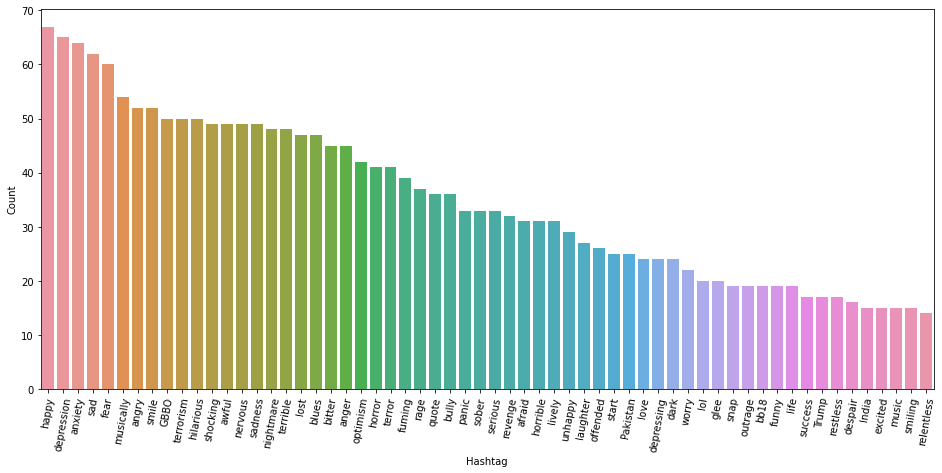

In [65]:
generate_hashtag_freqdist(hashtags)

In [68]:
# retrieving the lengths o
data['total_length_characters'] = data['content'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["content"]:
    count = count + 1
print(count)
average_length = (total_length_characters / count)
print (average_length)

0       109
1        67
2       115
3       101
4       135
       ... 
7097    102
7098     37
7099    135
7100     94
7101    139
Name: total_length_characters, Length: 7102, dtype: int64
680776
7102
95.85694170656153


In [69]:
data['total_count_words'] = data['sentiment'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for y in data["sentiment"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0       1
1       1
2       1
3       1
4       1
       ..
7097    1
7098    1
7099    1
7100    1
7101    1
Name: total_count_words, Length: 7102, dtype: int64
7102
7102
1.0


In [71]:
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthibalasundaram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

In [73]:
data['total_length_characters'] = data['content'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["content"]:
    count = count + 1
print(count)
average_length = total_length_characters / count
print (average_length)

0        59
1        48
2        48
3        47
4        73
       ... 
7097     63
7098     25
7099     90
7100     67
7101    101
Name: total_length_characters, Length: 7102, dtype: int64
423548
7102
59.637848493382144


In [74]:
data['total_count_words'] = data['sentiment'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for y in data["sentiment"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0       1
1       1
2       1
3       1
4       1
       ..
7097    1
7098    1
7099    1
7100    1
7101    1
Name: total_count_words, Length: 7102, dtype: int64
7102
7102
1.0


In [68]:
# !pip3 install textblob

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 636 kB 1.7 MB/s            
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [75]:
from textblob import TextBlob

In [76]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [77]:
data['Sentiment'] = data['sentiment'].apply(lambda x:analyze_sentiment(x))
data['Source'] = 'random_user'
data['Length'] = data['content'].apply(len)
data['Word_counts'] = data['content'].apply(lambda x:len(str(x).split()))

In [83]:
data1=data[['content','sentiment', 'Source',
'Length','Word_counts']]
data1.head(680)

,content,sentiment,Source,Length,Word_counts
0,point today someon say someth remot kind water...,anger,random_user,59,10
1,corningfootbal game day minus relentless,anger,random_user,48,5
2,game piss game year blood boil time turn stlcard,anger,random_user,48,9
3,spamvici ive found candic candac pout like ðÿ˜,anger,random_user,47,8
4,moocowward mrsajhargreav garybarlow cant come...,anger,random_user,73,9
...,...,...,...,...,...
675,last madden commerci ðÿ˜†ðÿ˜†ðÿ˜†ðÿ˜†ðÿ˜†ðÿ˜† tnf,anger,random_user,49,5
676,plasmaassassin armoureddov nno wrath,anger,random_user,37,4
677,dreamsandpocki like despit irrit toward ur shi...,anger,random_user,91,13
678,whenev pout want adrian appear tell stop pout els,anger,random_user,49,9


In [119]:
# file_name = 'data1.xlsx'
# # saving the excel
# marks_data.to_excel(data1)
# print('DataFrame is written to Excel File successfully.')

In [84]:
# data1=data[['tweet','retweets_count', 'Sentiment', 'Source',
# 'Length','Word_counts']]
# data1.head()

In [85]:
data1['Clean tweet'] = data1['content'].apply(lambda x:clean(x))

In [87]:
data1[["Clean tweet","sentiment"]].iloc[100]

Clean tweet    noth relentless dog beg food
sentiment                             anger
Name: 100, dtype: object

In [89]:
sentiment = data1['sentiment'].value_counts()
sentiment

fear       2252
anger      1701
joy        1616
sadness    1533
Name: sentiment, dtype: int64

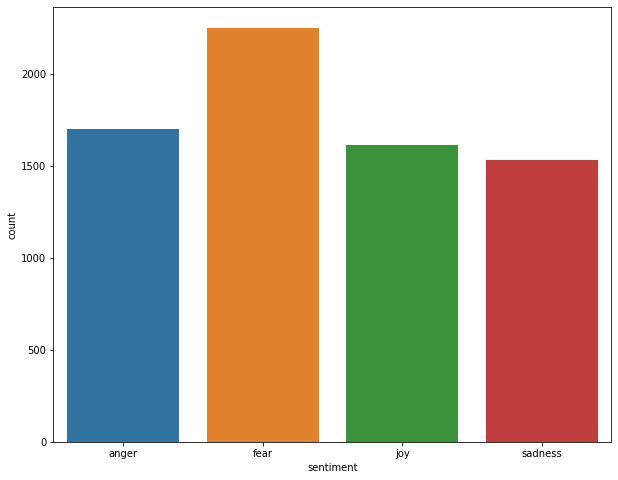

In [91]:
plt.figure(figsize = (10,8))
sns.countplot(data = data1, x = 'sentiment')
plt.show()

In [103]:
# #neutral_text
# print("Neutral tweet example :",neutral['content'].values[0])
# # Positive tweet
# print("Positive Tweet example :",positive['content'].values[0])
# #negative_text
# print("Negative Tweet example :",negative['content'].values[0])

In [104]:
from wordcloud import WordCloud

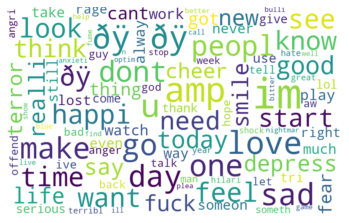

In [105]:
txt = ' '.join(text for text in data1['Clean tweet'])
wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [100]:
# positive_words =' '.join([text for text in data1['Clean tweet'][data1['Sentiment'] == 1]])
# #wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
# wordcloud1 = WordCloud(
#             random_state=21,
#             max_font_size = 110,
#             max_words = 100,
#             width = 800,
#             height = 500
#             ).generate(txt)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

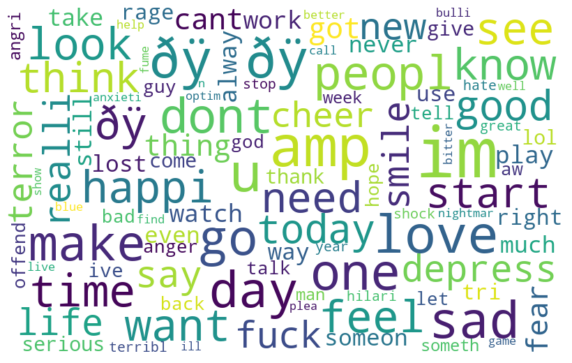

In [110]:
positive_words =' '.join([text for text in data1['Clean tweet'][data1['sentiment'] == 'anger']])
#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
wordcloud1 = WordCloud(
            random_state=21,
            max_font_size = 110,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

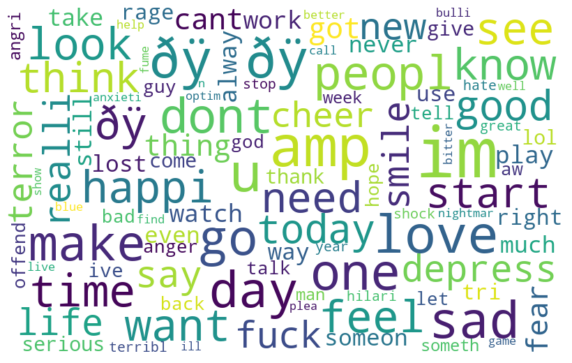

In [112]:
negative_words =' '.join([text for text in data1['Clean tweet'][data1['sentiment'] == 'fear']])
#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
wordcloud1 = WordCloud(
            random_state=21,
            max_font_size = 110,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

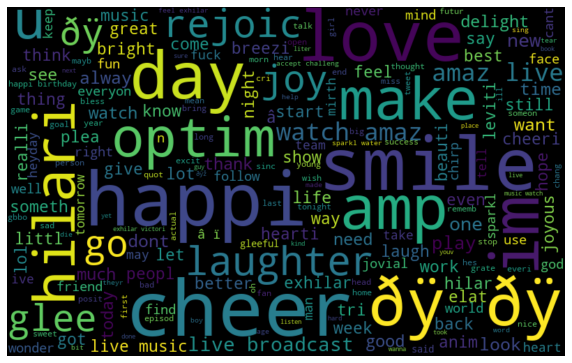

In [114]:
neutral_words =' '.join([text for text in data1['Clean tweet'][data1['sentiment'] == 'joy']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

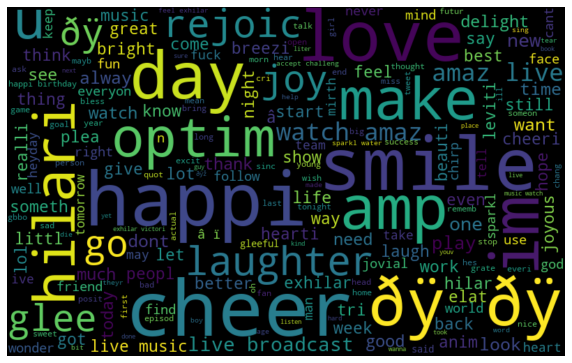

In [115]:
sad1 =' '.join([text for text in data1['Clean tweet'][data1['sentiment'] == 'sadness']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Thank you for time.
## <font color= 'red'>Dataset may be shared upon request.</font>